In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [29]:
df = pd.read_excel("assets/data_split.xlsx", "All").sample(frac=1)
df.head()

,Unnamed: 0,190,191,192,193,194,195,196,197,198,...,793,794,795,796,797,798,799,800,label,encode
48,20,0.4196,0.4279,0.4266,0.4276,0.4386,0.4342,0.4337,0.4403,0.4507,...,-0.0025,-0.0030,-0.0033,-0.0032,-0.0031,-0.0033,-0.0032,-0.0031,TM 05,1
27,28,0.7681,0.7654,0.7774,0.7938,0.7967,0.8009,0.7939,0.8121,0.8240,...,0.0079,0.0078,0.0079,0.0080,0.0079,0.0079,0.0083,0.0086,QN02,0
57,29,0.2368,0.2269,0.2330,0.2536,0.2426,0.2210,0.2282,0.2428,0.2536,...,-0.0056,-0.0059,-0.0060,-0.0059,-0.0057,-0.0054,-0.0057,-0.0057,FANTA 02,1
13,14,0.7681,0.7654,0.7774,0.7938,0.7967,0.8009,0.7939,0.8121,0.8240,...,0.0079,0.0078,0.0079,0.0080,0.0079,0.0079,0.0083,0.0086,HamY06,0
37,9,0.5443,0.5361,0.5198,0.5120,0.5277,0.5413,0.5409,0.5407,0.5469,...,-0.0019,-0.0019,-0.0020,-0.0021,-0.0020,-0.0020,-0.0022,-0.0018,NC 04,1


In [30]:
y = df.iloc[:, -1]
X = df.drop(["label","encode"], axis=1).iloc[:, 1:]
y.values

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [31]:
n_components = 5
pca = PCA(n_components)
X_pca = pca.fit_transform(X)

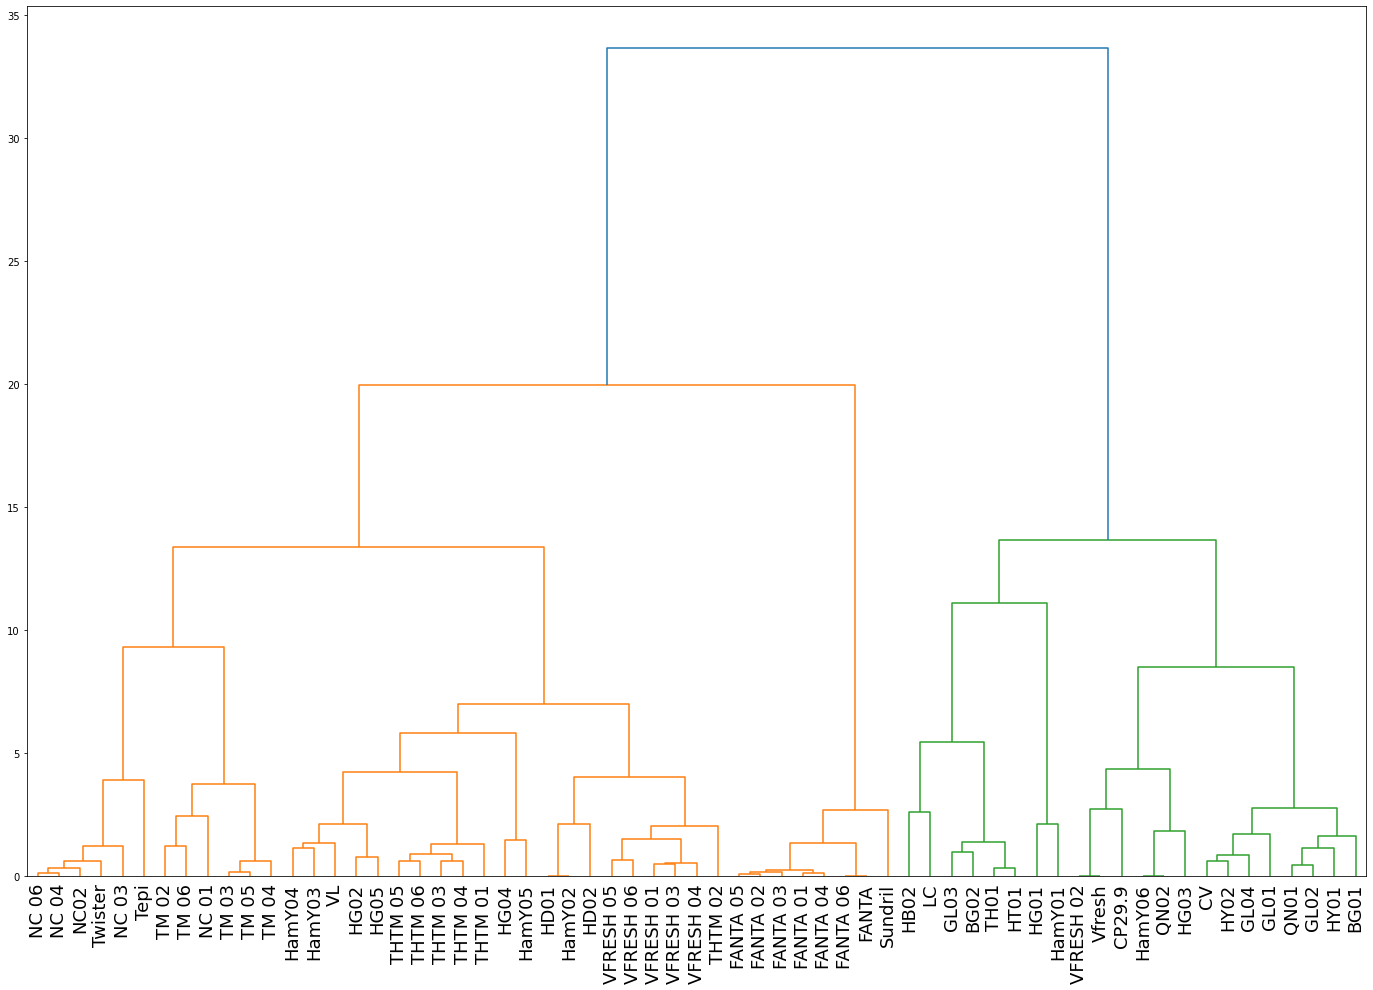

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X_pca, 'ward', metric='euclidean')

labelList = df["label"].values

plt.figure(figsize=(24, 16))
den = dendrogram(linked,
            # orientation='top',
            labels=labelList,
            distance_sort='descending',
            # show_leaf_counts=True,
            leaf_font_size=18)

# ax = plt.gca()
# ax.tick_params(axis='x', which='major', labelsize=18)
# ax.tick_params(axis='y', which='major', labelsize=14)
plt.show()

In [33]:
print(np.unique(den['color_list']))

['C0' 'C1' 'C2']


In [34]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
# pd.concat([pd.DataFrame(cluster.fit_predict(X)), y], axis=1).values

In [35]:
y_pred = cluster.fit_predict(X_pca)
1 - y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_pred = 1-y_pred
# Calculate precision, recall, and F1-score
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Accuracy: ", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)

Accuracy:  82.53968253968253
Precision: 78.04878048780488
Recall: 94.11764705882352
F1-score: 85.33333333333334
